<a href="https://colab.research.google.com/github/salonii1030/GUVI-Machine_Learning-Task_7/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df = df.drop(['User ID','Gender'],axis = 1)

In [ ]:
df.drop_duplicates()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier(n_neighbors=4)

In [ ]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  0.9964285714285714  score :  0.8535714285714284
K value  :  2  train score :  0.9178571428571428  score :  0.8285714285714285
K value  :  3  train score :  0.9357142857142857  score :  0.8821428571428571
K value  :  4  train score :  0.9107142857142857  score :  0.8785714285714287
K value  :  5  train score :  0.9071428571428571  score :  0.8821428571428571
K value  :  6  train score :  0.9  score :  0.8857142857142858
K value  :  7  train score :  0.9  score :  0.8821428571428571
K value  :  8  train score :  0.8928571428571429  score :  0.8750000000000002
K value  :  9  train score :  0.9  score :  0.8928571428571429
K value  :  10  train score :  0.9  score :  0.8928571428571429
K value  :  20  train score :  0.9  score :  0.8964285714285716
K value  :  50  train score :  0.8928571428571429  score :  0.8785714285714287


In [ ]:
# For Best value of 'k'
knn = KNeighborsClassifier(20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

**Predicting the Test set results**

In [ ]:
y_pred = knn.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
con = confusion_matrix(y_test,y_pred)
print(con)

[[77  5]
 [ 3 35]]


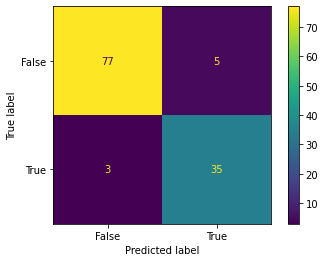

In [ ]:
display_plt = metrics.ConfusionMatrixDisplay(confusion_matrix = con, display_labels = [False, True])
display_plt.plot()
plt.show()